In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("Titanic-Dataset.csv") 

print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

In [9]:
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())

if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

print("\nMissing Values After Cleaning:\n", df.isnull().sum())




Missing Values Before Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64



Survival Rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


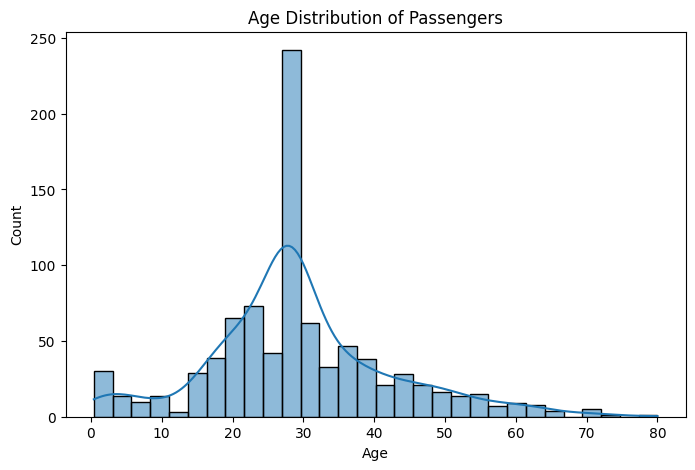

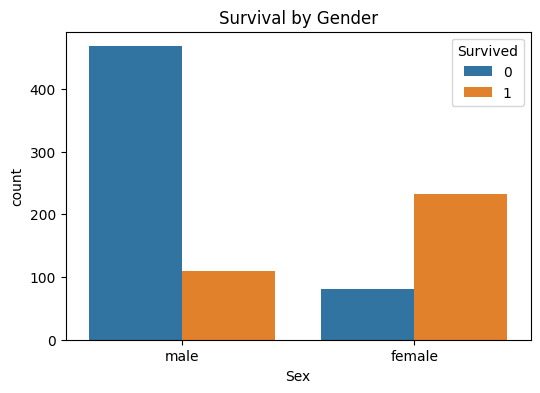

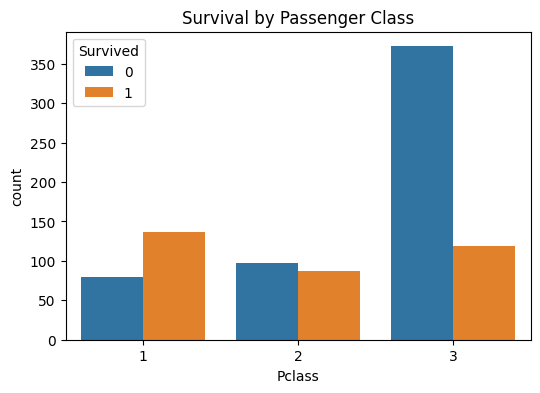

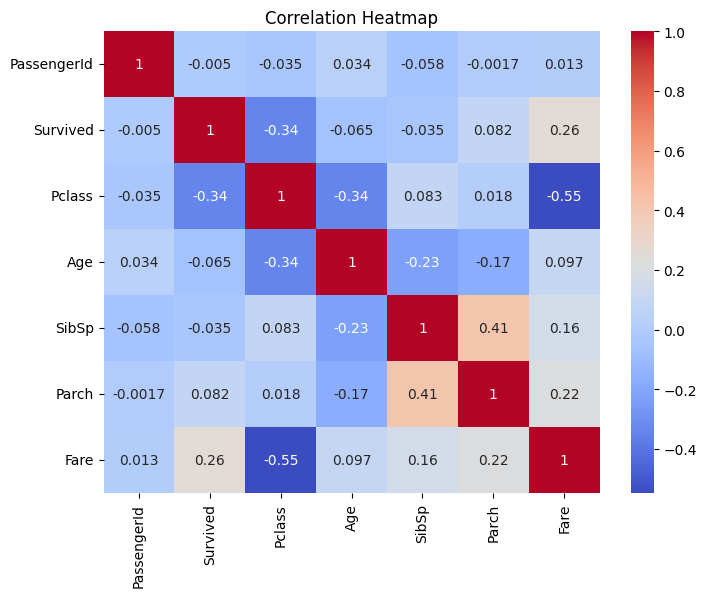

In [11]:
if 'Survived' in df.columns:
    print("\nSurvival Rate:")
    print(df['Survived'].value_counts(normalize=True))

if 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title("Age Distribution of Passengers")
    plt.show()

if 'Sex' in df.columns and 'Survived' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Sex', hue='Survived')
    plt.title("Survival by Gender")
    plt.show()

if 'Pclass' in df.columns and 'Survived' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Pclass', hue='Survived')
    plt.title("Survival by Passenger Class")
    plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [12]:
if 'Survived' in df.columns:
    empirical_prob = df['Survived'].mean()
    print(f"\nEmpirical Probability of Survival: {empirical_prob:.2f}")

theoretical_prob = 0.5
print(f"Theoretical Probability (assumed): {theoretical_prob:.2f}")

print(f"Difference (Empirical - Theoretical): {empirical_prob - theoretical_prob:.2f}")



Empirical Probability of Survival: 0.38
Theoretical Probability (assumed): 0.50
Difference (Empirical - Theoretical): -0.12
